#importing basic libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#reading data set

In [ ]:
glass=pd.read_csv('Glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass.shape

(214, 10)

In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [ ]:
glass.duplicated().value_counts()

False    213
True       1
dtype: int64

In [ ]:
glass[glass.duplicated()]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
glass_1=glass.drop_duplicates()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler()

In [ ]:
x=glass_1.iloc[:,0:9]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
y=glass_1.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [ ]:
data=pd.DataFrame(std.fit_transform(x))
data

,0,1,2,3,4,5,6,7,8
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


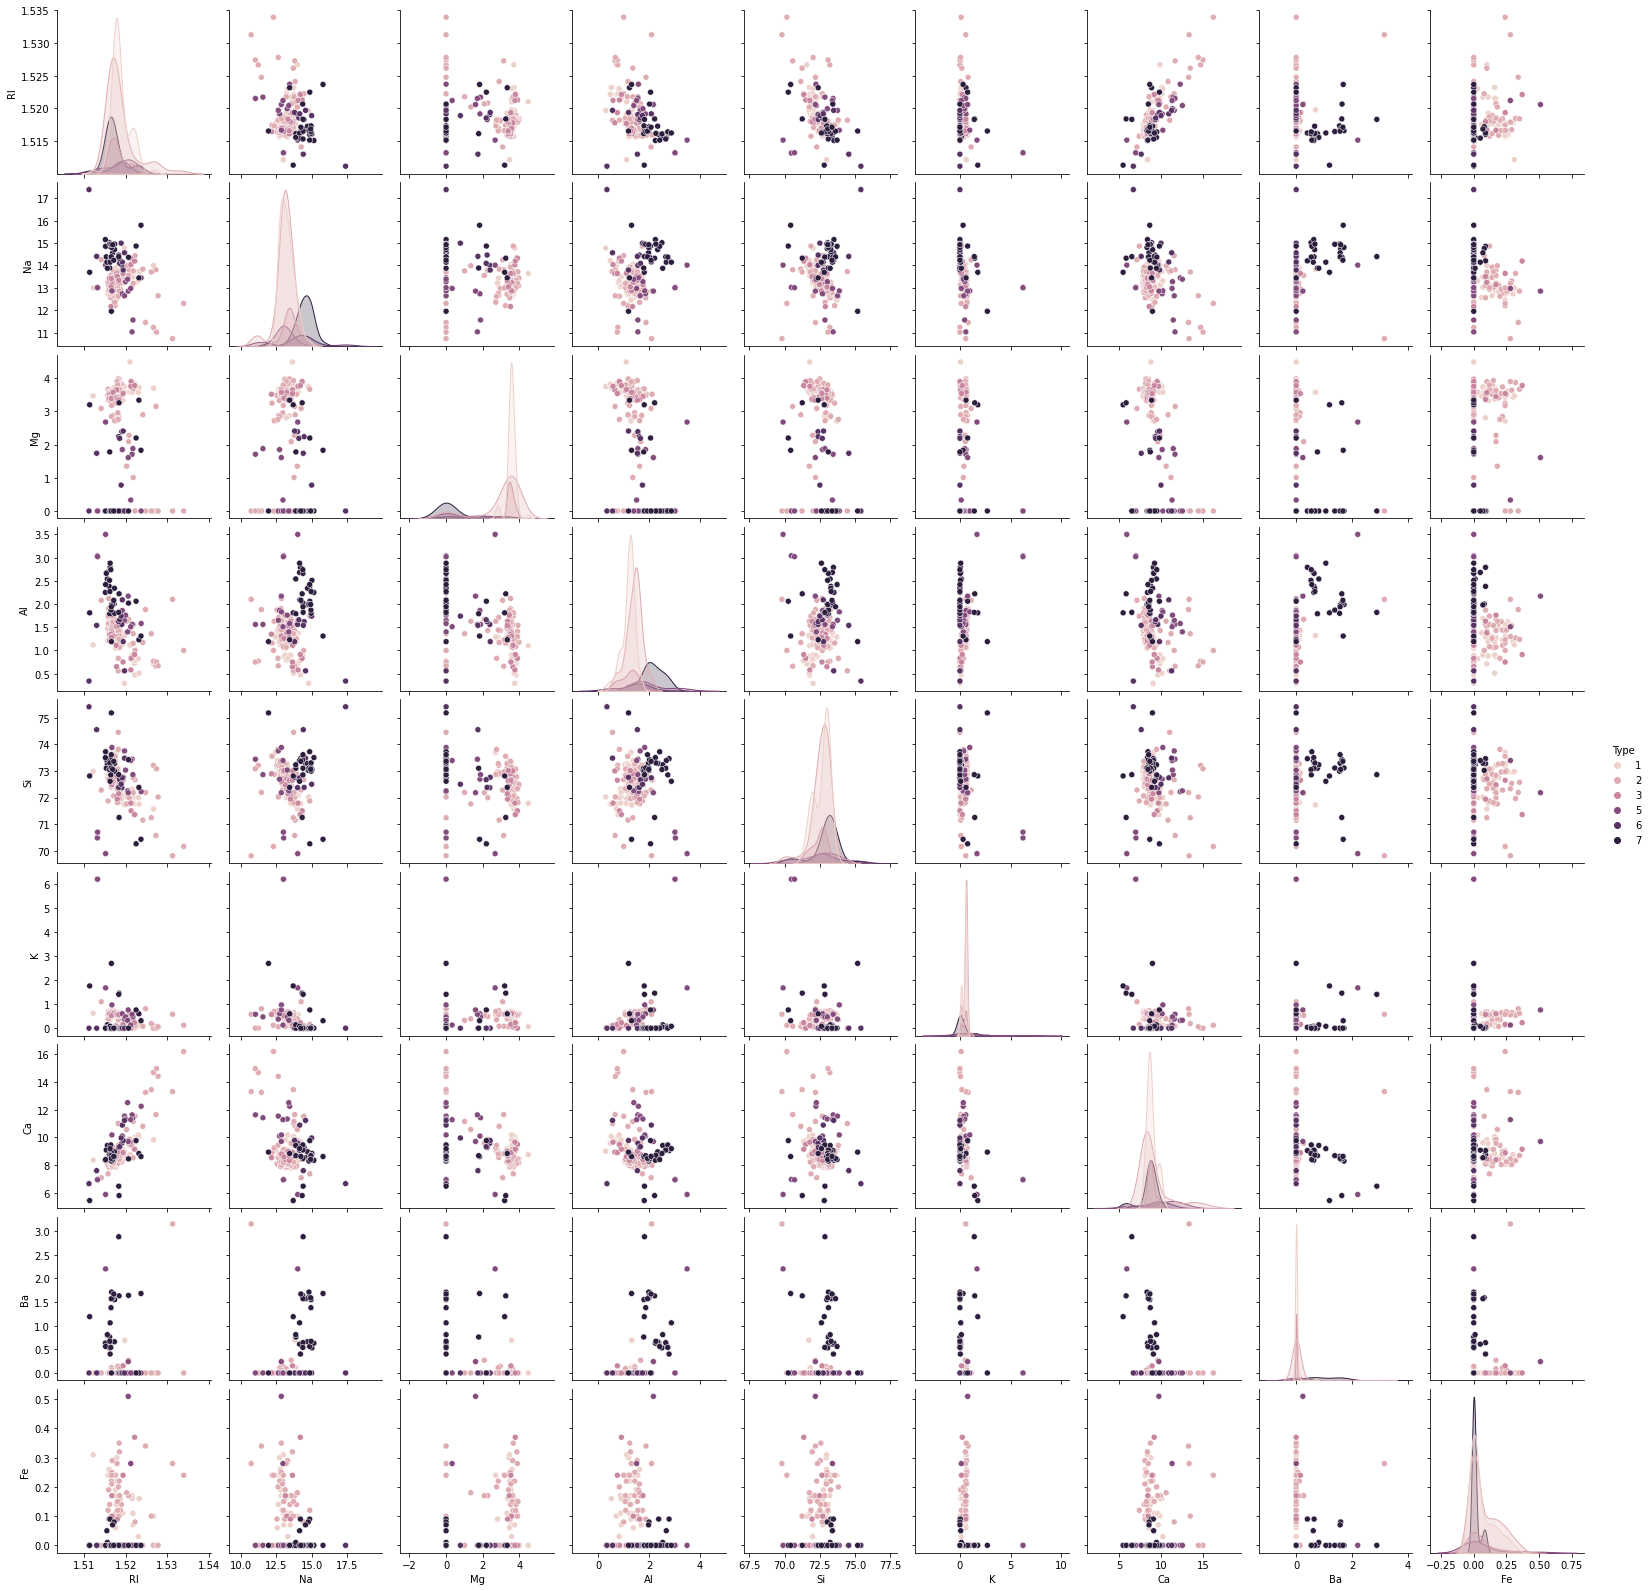

In [ ]:
import seaborn as sns
sns.pairplot(glass_1,hue='Type')

In [ ]:
#the pair plot shows that the data is non linear

In [ ]:
#spliting the data into x&y features

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.3)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
 corr=glass_1.corr()
 corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


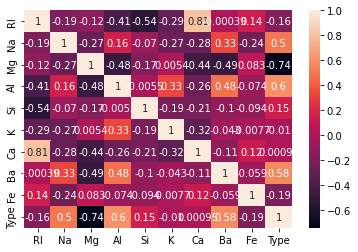

In [ ]:
sns.heatmap(corr,annot=True)

In [ ]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
174,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51
138,1.51674,12.79,3.52,1.54,73.36,0.66,7.90,0.00,0.00
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00
182,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00
...,...,...,...,...,...,...,...,...,...
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00
93,1.51590,13.24,3.34,1.47,73.10,0.39,8.22,0.00,0.00
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00


In [ ]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
198,1.51531,14.38,0.00,2.66,73.10,0.04,9.08,0.64,0.00
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09
118,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29
...,...,...,...,...,...,...,...,...,...
68,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
136,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.00,0.12
57,1.51824,12.87,3.48,1.29,72.95,0.60,8.43,0.00,0.00


In [ ]:
y_train

174    5
138    2
66     1
109    2
182    6
      ..
107    2
14     1
93     2
180    6
103    2
Name: Type, Length: 149, dtype: int64

In [ ]:
y_test

9      1
198    7
67     1
192    7
118    2
      ..
68     1
5      1
136    2
57     1
200    7
Name: Type, Length: 64, dtype: int64

#building KNN

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_1=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_test,y_test)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
#predicting on test data

In [ ]:
y_pred=knn.predict(x_test)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 6, 5, 7, 1, 1, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 6, 1, 1, 2, 3, 1, 2, 7, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 3, 1, 1, 2, 1, 2, 2, 1, 5, 1, 2, 1, 1, 7])

In [ ]:
pd.Series(y_pred).value_counts()

1    29
2    20
7     8
5     3
6     2
3     2
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy',accuracy_score(y_test,y_pred)*100)

Accuracy 64.0625


In [ ]:
knn.score(x_train,y_train)

0.8120805369127517

#finding cross validation score

In [ ]:
results=cross_val_score(knn,x_train,y_train,cv=10)
results.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


0.6785714285714286

In [ ]:
results_1=cross_val_score(knn_1,x_test,y_test,cv=15)
results_1.mean()

0.64

#grid search for algorithm tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_neighbors=np.array(range(1,20))
param_grid=dict(n_neighbors=n_neighbors)

In [ ]:
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [ ]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=10)
grid.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
grid.best_params_

{'n_neighbors': 1}

In [ ]:
grid.best_score_

0.6785714285714286

#visualise cv results for training data

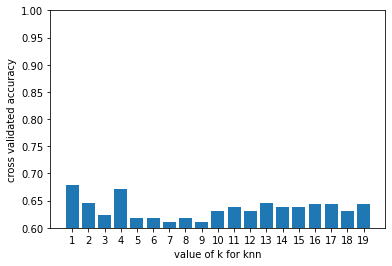

In [ ]:
k_range=range(1,20)
k_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x_train,y_train,cv=10)
  k_scores.append(scores.mean())
plt.bar(k_range,k_scores)
plt.xlabel('value of k for knn')
plt.ylabel('cross validated accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()  
import warnings
warnings.filterwarnings('ignore')


#visualise cv results for testing data

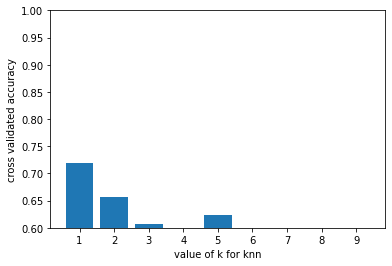

In [ ]:
k_range=range(1,10)
k_scores=[]
for k in k_range:
  model_1=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(model_1,x_test,y_test,cv=10)
  k_scores.append(scores.mean())
plt.bar(k_range,k_scores)
plt.xlabel('value of k for knn')
plt.ylabel('cross validated accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()  

#best accuracy=0.6785714285714286 with k=1 for training data
#best accuracy=0.64 with k=1 for testing data